<a href="https://colab.research.google.com/github/Alfikriangelo/DeepLearningTasks/blob/main/3rdWeekTask/Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install imbalanced-learn

In [5]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv("sample_data/income (1).csv")

In [7]:
# Drop missing values
df.dropna(inplace=True)

In [8]:
# Encode target column: 1 if income >50K, else 0
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [9]:
# Identify categorical features
categorical_cols = df.select_dtypes(include='object').columns

In [10]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols)

In [11]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

In [12]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [13]:
# Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [14]:
# Scale features for k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### k-Nearest Neighbors (k-NN)

Algoritma k-NN menentukan kelas dari sebuah data baru dengan melihat \(k\) tetangga terdekatnya berdasarkan jarak (umumnya Euclidean distance). Kelas yang paling sering muncul dari tetangga-tetangga tersebut akan dipilih.

#### Persamaan Euclidean Distance

$$
d(x, x') = \sqrt{\sum_{i=1}^{n} (x_i - x_i')^2}
$$

- \( x \) = data baru
- \( x' \) = tetangga dari data latih
- \( n \) = jumlah fitur

Semakin kecil jarak \( d \), semakin dekat data tersebut dianggap mirip.

In [15]:
# ========================
# Train k-NN Classifier
# ========================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

### Decision Tree

Decision Tree bekerja dengan membagi data ke dalam node berdasarkan fitur yang memaksimalkan pemisahan kelas. Setiap pembagian (split) didasarkan pada **impurity** — seberapa “campur aduk” sebuah node.

#### Entropy (untuk mengukur impurity)

$$
H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

- \( S \) = himpunan data dalam node
- \( c \) = jumlah kelas
- \( p_i \) = proporsi data di kelas ke-\(i\)

In [16]:
# ================================
# Train Decision Tree Classifier
# ================================
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Evaluation

Akurasi

Akurasi mengukur seberapa sering model membuat prediksi yang benar (baik positif maupun negatif).

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Presisi

Presisi menunjukkan proporsi dari prediksi positif yang benar-benar positif. Cocok ketika kesalahan prediksi positif perlu diminimalkan.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Recall (Sensitivitas)

Recall menghitung berapa banyak kasus positif yang berhasil dikenali oleh model.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

F1 Score

F1 Score adalah rata-rata harmonik dari Precision dan Recall. Berguna saat data tidak seimbang dan kita butuh keseimbangan antara keduanya.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

False Positive Rate (FPR)

FPR mengukur seberapa sering model salah memprediksi negatif sebagai positif.

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

True Positive Rate (TPR / Recall)

TPR adalah recall itu sendiri — proporsi kasus positif yang berhasil terdeteksi.

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

AUC (Area Under Curve)

AUC adalah area di bawah kurva ROC yang menunjukkan kemampuan model dalam membedakan antara dua kelas. Semakin mendekati 1, semakin baik.

$$
AUC = \int_{0}^{1} TPR(FPR) \, dFPR
$$

In [17]:
# ========================
# Evaluation Function
# ========================
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"=== {model_name} (With SMOTE) ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print()

In [18]:
# Evaluate both models
evaluate_model(y_test, y_pred_knn, y_prob_knn, "k-NN")
evaluate_model(y_test, y_pred_tree, y_prob_tree, "Decision Tree")

=== k-NN (With SMOTE) ===
Accuracy: 0.8978758169934641
Precision: 0.9200691581327304
Recall: 0.8710652228657769
F1 Score: 0.8948968372032857
ROC AUC Score: 0.9546010094515223
Confusion Matrix:
 [[7369  601]
 [1024 6918]]

=== Decision Tree (With SMOTE) ===
Accuracy: 0.877325289089995
Precision: 0.8692971639950678
Recall: 0.8876857214807353
F1 Score: 0.8783952155494642
ROC AUC Score: 0.8773434880929398
Confusion Matrix:
 [[6910 1060]
 [ 892 7050]]



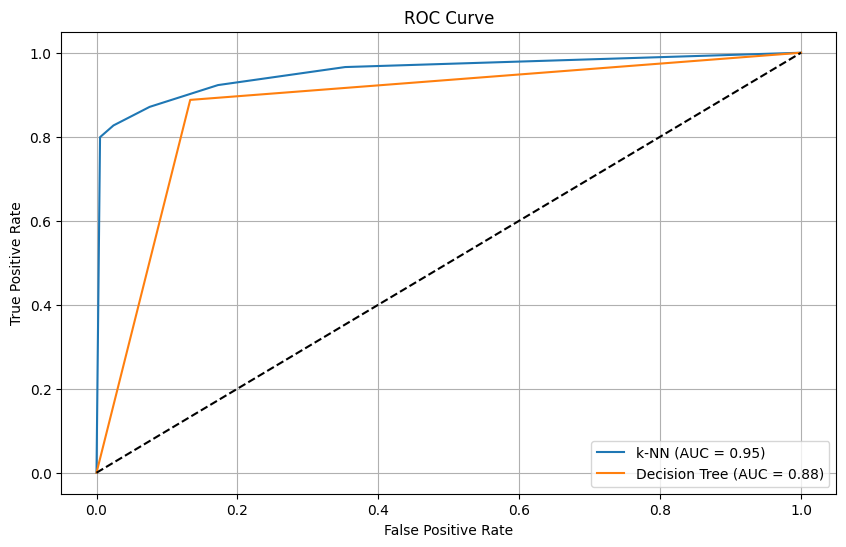

In [19]:
# ========================
# Plot ROC Curves
# ========================
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_knn)))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_tree)))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### Hasil Evaluasi Model k-NN (Dengan SMOTE)

Model k-NN setelah diimbangi menggunakan SMOTE memberikan hasil sebagai berikut:

- **Accuracy**: 0.8979  
- **Precision**: 0.9201  
- **Recall**: 0.8711  
- **F1 Score**: 0.8949  
- **ROC AUC Score**: 0.9546  

#### Confusion Matrix:
$$
\begin{bmatrix}
7369 & 601 \\
1024 & 6918 \\
\end{bmatrix}
$$

#### Interpretasi:
- **Akurasi tinggi (89.8%)**, menunjukkan model mampu mengklasifikasikan data dengan sangat baik secara keseluruhan.
- **Precision 92%** artinya mayoritas prediksi positif benar.
- **Recall 87%** menunjukkan model juga tidak banyak melewatkan data positif.
- **F1 Score** seimbang di tengah precision dan recall yang tinggi.
- **AUC 0.95** → menunjukkan model sangat baik dalam membedakan kelas positif dan negatif.

---

### Hasil Evaluasi Model Decision Tree (Dengan SMOTE)

- **Accuracy**: 0.8773  
- **Precision**: 0.8693  
- **Recall**: 0.8877  
- **F1 Score**: 0.8784  
- **ROC AUC Score**: 0.8773  

#### Confusion Matrix:
$$
\begin{bmatrix}
6910 & 1060 \\
892 & 7050 \\
\end{bmatrix}
$$

#### Interpretasi:
- Akurasi masih tinggi (87.7%), sedikit lebih rendah dari k-NN.
- Recall lebih tinggi dari precision → model cukup agresif menangkap kelas positif.
- AUC 0.877 menunjukkan performa klasifikasi masih baik, walaupun sedikit di bawah k-NN.
- Cocok ketika fokus utamanya adalah **mendeteksi sebanyak mungkin kasus positif (recall)**.

---

### 🧾 Kesimpulan Perbandingan

| Metrik         | k-NN (SMOTE) | Decision Tree (SMOTE) |
|----------------|--------------|------------------------|
| Accuracy       | 0.8979       | 0.8773                 |
| Precision      | 0.9201       | 0.8693                 |
| Recall         | 0.8711       | 0.8877                 |
| F1 Score       | 0.8949       | 0.8784                 |
| ROC AUC Score  | 0.9546       | 0.8773                 |

**k-NN** unggul dalam hampir semua metrik, terutama dalam membedakan kelas (AUC sangat tinggi).  
**Decision Tree** bisa jadi pilihan jika kamu lebih mengutamakan interpretabilitas dan kecepatan.

